**PARTIE 1 - Etude du problème d'optimisation**

*Question 1*

Posons $f(u = (u(i,j))_{i,j}) = \frac{1}{2} \Vert u - u_b \Vert _2^2 + \displaystyle \sum_{(i, j)} \Vert \nabla u(i, j) \Vert _2^2$. 

Le problème de minimisation est alors le suivant : 
$\underset{\substack{c_{1,ij}(u) \le 0 \\ c_{2, ij}(u)\le 0}}{\min} f(u)$, où $c_{1, ij(u)} = -u(i,j)$ et $c_{2, ij}(u) = u(i,j)-1$.

*Question 2*

- f est convexe : elle s'écrit comme somme de fonctions convexes. En effet, soient u et v deux images de $\mathbb R^{n \times m}, t \in [0, 1]$. 
$\begin{aligned} t \Vert u \Vert^2 + (1-t) \Vert v \Vert^2 - \Vert tu + (1-t)v \Vert^2 & \ge t \Vert u \Vert^2 - t^2 \Vert u \Vert^2 + (1-t) \Vert v \Vert ^2 - (1-t)^2 \Vert v \Vert ^2 - 2t(1-t) \Vert u \Vert \Vert v \Vert \\
& \ge t(1-t) \Vert u \Vert^2 + t(1-t) \Vert v \Vert^2 - t(1-t)\Vert u \Vert \Vert v \Vert \\
& \ge t(1-t)(\Vert u \Vert - \Vert v \Vert)^2 \\
& \ge 0 \end{aligned} $ 

en utilisant l'inégalité triangulaire à la première ligne. 

La norme au carré étant convexe et le gradient linéaire, puisque notre fonction est une somme de normes au carré, elle est convexe. 

- f est différentiable : le premier terme est une norme 2 au carré, dont on sait qu'elle est différentiable. Le second terme est une somme de normes 2 au carré de gradients, qui sont des applications linéaires donc différentiables. Ainsi, le second terme est différentiable. Par somme, f est différentiable.

*Question 3*
On s'intéresse d'abord à $f_2(u) = \sum_{i,j}\Vert \nabla u(i,j) \Vert _2^2 = \sum_{i,j} \langle\nabla u(i,j), \nabla u(i,j) \rangle$

$\begin{aligned} \langle \nabla u+h, \nabla u+h \rangle &= \langle \nabla u , \nabla u \rangle + 2 \langle \nabla u, \nabla h \rangle + \langle \nabla h, \nabla h \rangle \\
&=  \langle \nabla u , \nabla u \rangle + 2\langle \nabla^* \nabla u, h \rangle + o(h^2) \end{aligned} $.


Montrons que $\nabla^* = -\operatorname{div}$, soit : 
$\forall u, \forall v , \,\langle \nabla u, v \rangle = - \langle u, \operatorname{div}(v) \rangle$.


Soient $u, v$ deux gradients d'image.

Tout d'abord, en regardant la composante en $x$: 


$$
\begin{aligned}
\sum_{i=1}^{n-1} \sum_{j=1}^{m} \nabla_x u(i,j) v_x(i,j) &= \sum_{i=1}^{n-1} \sum_{j=1}^{m} (u(i+1,j) - u(i,j)) v_x(i,j) \\
&= - \sum_{i=1}^{n-1} \sum_{j=1}^{m} u(i,j) (v_x(i,j) - v_x(i-1,j)) + \text{termes de bord}
\end{aligned}
$$

en utilisant la sommation d'Abel, ou intégration par partie discrète.

De la même manière en $y$:


$$
\begin{aligned}
\sum_{i=1}^{n} \sum_{j=1}^{m-1} \nabla_y u(i,j) v_y(i,j) &= \sum_{i=1}^{n} \sum_{j=1}^{m-1} (u(i,j+1) - u(i,j)) v_y(i,j) \\
&= - \sum_{i=1}^{n} \sum_{j=1}^{m-1} u(i,j) (v_y(i,j) - v_y(i,j-1)) + \text{termes de bord}
\end{aligned}
$$


En regroupant les deux directions :
$
\langle \nabla u, v \rangle = - \langle u, \operatorname{div}(v) \rangle + \text{termes de bord}
$

Sous hypothèse de conditions de bord nulles (valeurs nulles sur les bords de $u$ ou $v$), on obtient :
$$
\nabla^* = - \operatorname{div}
$$
dont on déduit $\nabla f_2(u) = - 2 \Delta u$



Regardons maintenant la partie $f_1(u) = \frac{1}{2}\Vert u - u_b \Vert^2$.
Alors il est clair que $\nabla f_1(u) = u - u_b$.

Dès lors, $\boxed{\nabla f(u) = u - u_b - 2 \Delta u}$

**PARTIE 2 - Résolution numérique**

*Question 4*

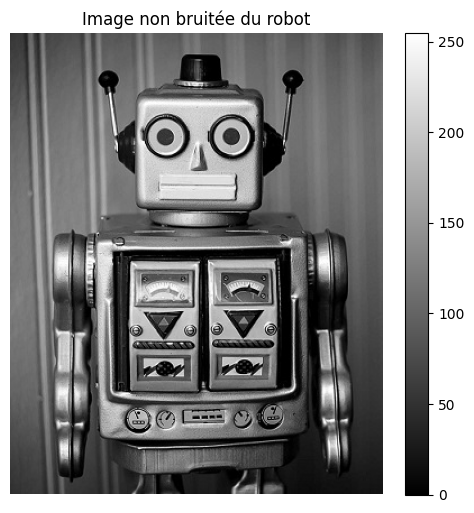

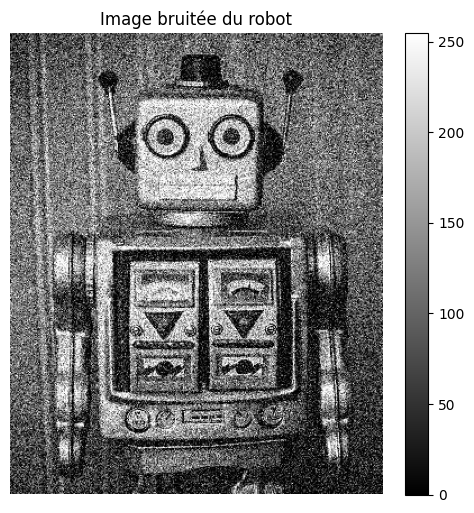

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy.signal import wiener #méthode pour Q7
import time #pour comparer les temps de calculs

img_jpg = "robot_no_noise.jpg"
img_bruitee_jpg = "robot_noise.jpg"
img_couleur = plt.imread(img_jpg)
img_bruitee_couleur = plt.imread(img_bruitee_jpg)

#on repasse du format (n,m,3) à (n,m) pour les calculs
img = np.mean(img_couleur, axis=2)/255
img_bruitee = np.mean(img_bruitee_couleur, axis=2)/255
n,m = img.shape

#affichage de l'image débruitée et bruitée pour comparaison postérieure
plt.figure(figsize=(6, 6))
plt.imshow(img_couleur, cmap="gray")
plt.colorbar()
plt.title("Image non bruitée du robot")
plt.axis("off")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(img_bruitee_couleur, cmap="gray")
plt.colorbar()
plt.title("Image bruitée du robot")
plt.axis("off")
plt.show()

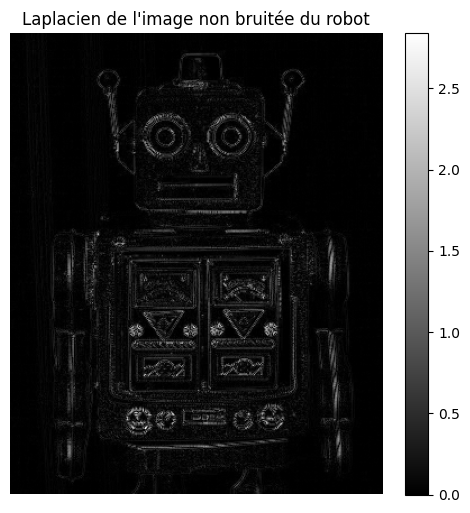

In [3]:
#Définition de gradient et divengence

def gradient(img):
    grad_x = np.zeros_like(img)
    grad_y = np.zeros_like(img)

    grad_x[:-1, :] = img[1:, :] - img[:-1, :]
    grad_x[-1, :] = 0

    grad_y[:, :-1] = img[:, 1:] - img[:, :-1]
    grad_y[:, -1] = 0

    return grad_x, grad_y

def divergence(grad_x, grad_y):
    div = np.zeros_like(grad_x)

    div[1:, :] += grad_x[1:, :] - grad_x[:-1, :]
    div[0, :] += grad_x[0, :]  
    div[-1, :] -= grad_x[-1, :] 

    div[:, 1:] += grad_y[:, 1:] - grad_y[:, :-1]
    div[:, 0] += grad_y[:, 0] 
    div[:, -1] -= grad_y[:, -1]

    return div

#calcul du laplacien de l'image non bruitée 
grad_x, grad_y = gradient(img)
laplacien = abs(divergence(grad_x, grad_y))


plt.figure(figsize=(6, 6))
plt.imshow(laplacien, cmap="gray")
plt.colorbar()
plt.title("Laplacien de l'image non bruitée du robot")
plt.axis("off")
plt.show()

*Question 5*

Temps d'exécution Q5: 0.48484349250793457 secondes
Nombre d'itération Q5: 71


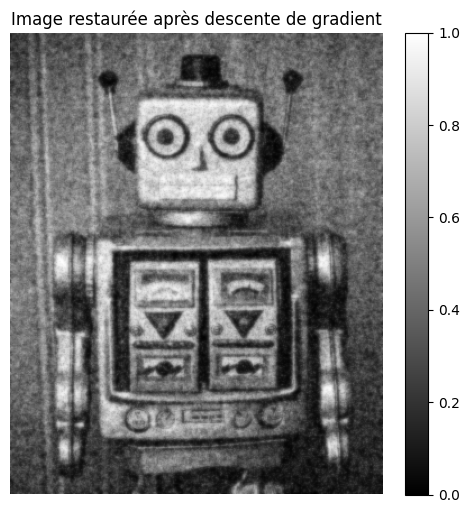

In [4]:
nombre_iter_Q5 = 0

def optim_gradient_fixed_step(img_bruitee, pas, max_iter, epsilon):
    '''méthode de descente de gradient à pas fixe'''
    global nombre_iter_Q5
    k = 0
    xk = img_bruitee.copy()
    
    while k < max_iter: 
        grad_x, grad_y = gradient(xk)
        laplacien = divergence(grad_x, grad_y)
        grad_f = xk - img_bruitee - 2*laplacien
        if np.linalg.norm(grad_f) < epsilon: #condition d'arrêt
            break

        
        xk = xk - pas*grad_f
        k += 1
        nombre_iter_Q5 += 1
    return xk

#paramètres
pas = 0.01   
max_iter = 10000
epsilon = 10

def mat_to_img(mat):
    """Convertit une matrice en une image RGB normalisée dans la plage [0, 1]."""
    mat_normalized = mat_normalized = (mat - np.min(mat)) / (np.max(mat) - np.min(mat))  # Normalisation [0, 1]
    image = np.zeros((mat.shape[0], mat.shape[1], 3))
    image[:, :, 0] = mat_normalized
    image[:, :, 1] = mat_normalized
    image[:, :, 2] = mat_normalized
    return image



start = time.time()
u_optim = optim_gradient_fixed_step(img_bruitee, pas, max_iter, epsilon)
u_optim_normalized = (u_optim - np.min(u_optim)) / (np.max(u_optim) - np.min(u_optim)) #normalisation
end = time.time()
print(f"Temps d'exécution Q5: {end - start} secondes")
print(f"Nombre d'itération Q5: {nombre_iter_Q5}")
nombre_iter_Q5 = 0

plt.figure(figsize=(6, 6))
plt.imshow(mat_to_img(u_optim_normalized), cmap="gray")
plt.colorbar()
plt.title("Image restaurée après descente de gradient")
plt.axis("off")
plt.show()

*Question 6*

In [5]:
def RMSE(img_cor,img = img):
    return (np.linalg.norm((img - img_cor))**2/(img.shape[0]*img.shape[1]))**0.5

print(f'RMSE de l\'image bruitée : {RMSE(img_bruitee)}')
print(f'RMSE de l\'image restaurée : {RMSE(u_optim_normalized)}')

#l'image restaurée est meilleure selon la RMSE (Plus de 2 fois meilleure)

RMSE de l'image bruitée : 0.18528446037844198
RMSE de l'image restaurée : 0.08808650994283712


Temps d'exécution Q7: 0.02002096176147461 secondes


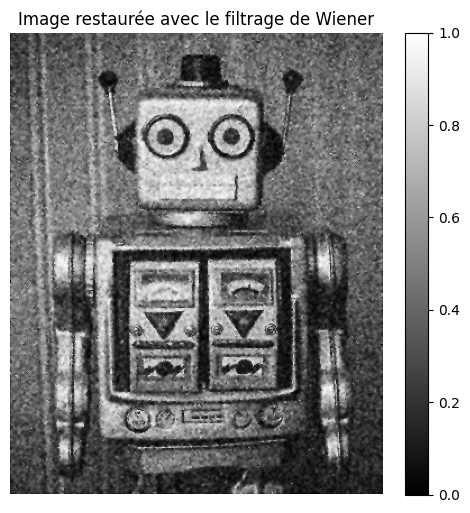

RMSE de l'image restaurée avec Wiener : 0.09454321842086694


In [6]:
#filtrage de Wiener
start = time.time()
img_wiener = wiener(img_bruitee)
end = time.time()
print(f"Temps d'exécution Q7: {end - start} secondes")

plt.figure(figsize=(6, 6))
plt.imshow(mat_to_img(img_wiener), cmap="gray")
plt.colorbar()
plt.title("Image restaurée avec le filtrage de Wiener")
plt.axis("off")
plt.show()

print(f'RMSE de l\'image restaurée avec Wiener : {RMSE(img_wiener)}')
#le RMSE est moins bon mais le temps d'execution est plus rapide 

*Choix des paramètres Q5*

Temps d'exécution de la méthode: 24.079092264175415 secondes
pas optimal: 0.01
RMSE optimal: 0.0876609505032704
liste espilon
[   1.            3.16227766   10.           31.6227766   100.
  316.22776602 1000.        ]
RMSE pour le pas optimal
[0.08766095 0.08766095 0.08766095 0.08793109 0.09419477 0.12650489
 0.18528446]


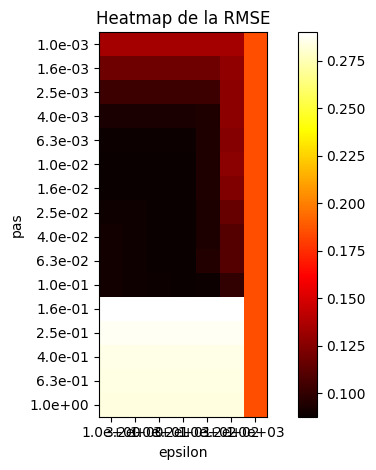

In [7]:
#Choix des paramètres
max_iter = 50

#tab_pas = np.logspace(-3,0,7)
#tab_eps = np.logspace(-3,3,7)

tab_pas = np.logspace(-3,0,16)
tab_eps = np.logspace(0,3,7)
mat_RMSE = np.zeros((len(tab_pas),len(tab_eps)))

min_RMSE = RMSE(img_bruitee)
pas_opti = -1
eps_opti = -1

start = time.time()
for i in range(len(tab_pas)):
    for j in range(len(tab_eps)):
        pas = tab_pas[i]
        epsilon = tab_eps[j]
        
        u_optim = optim_gradient_fixed_step(img_bruitee, pas, max_iter, epsilon)
        u_optim_normalized = (u_optim - np.min(u_optim)) / (np.max(u_optim) - np.min(u_optim)) #normalisation

        rmse = RMSE(u_optim_normalized)
        mat_RMSE[i,j] = rmse
        if min_RMSE > rmse:
            min_RMSE = rmse
            pas_opti = pas
            i_opti = i
            
end = time.time()
print(f"Temps d'exécution de la méthode: {end - start} secondes")

print(f"pas optimal: {pas_opti}")
print(f"RMSE optimal: {min_RMSE}")

print("liste espilon")
print(tab_eps)
print("RMSE pour le pas optimal")
print(mat_RMSE[i_opti])

im = plt.imshow(mat_RMSE, cmap='hot', interpolation='nearest')
plt.xticks(ticks=np.arange(len(tab_eps)), labels=[f"{e:.1e}" for e in tab_eps]) #:.1e pour ecriture scientifique
plt.yticks(ticks=np.arange(len(tab_pas)), labels=[f"{p:.1e}" for p in tab_pas])
plt.xlabel("epsilon")
plt.ylabel("pas")
plt.title("Heatmap de la RMSE")
plt.colorbar(im)
plt.tight_layout()
plt.show()

#On conclue ici le choix suivant partiellement arbitraire
#max_iter = 10000
#epsilon = 30
#pas = 0.01


**PARTIE 3 - Etude d'une nouvelle fonction TV-L2**

*Question 8*

On a déjà que la norme au carré est convexe. Il nous reste le terme de droite, une somme de normes 1. Prouvons la convexité de la norme 1.
Soient u et v deux images de $\mathbb R^{2 \times n \times m}, t \in [0, 1]$. 
$ \Vert tu + (1-t)v \Vert _1 \le |t| \Vert u \Vert _ 1 + |1-t| \Vert v \Vert _1 = t \Vert u \Vert _1 + (1-t) \Vert v \Vert _1 $ par inégalité triangulaire et homogénéité de la norme. 

Ainsi, par les mêmes arguments que ceux de la question 1 (linéarité du gradient, convexité des normes), la fonction $\mathrm{TV-L2}(u)$ est convexe.

La fonction n'est pas différentiable à cause du terme de norme 1. En effet, considérons u image uniforme constituée de pixels de même couleur : $\forall i, \forall j, u(i,j) = c$.
Alors pour tout pixel, $\nabla_x u(i,j) = \nabla_y u(i,j) = 0$.

Or, la fonction $|\cdot|$ n’est pas différentiable en 0.
$\operatorname{TV-LU}$ n'est donc pas différentiable.


*Question 9* 

Soit $g(u) = u - u_b - \mathrm{div} (\mathrm{sgn}( \nabla u))$.

On va montrer qu'il s'agit d'un sous-gradient en u de $\operatorname{TV-LU}$, soit $g(u) \in \partial \operatorname{TV-LU}(u)$.
On sait que $$\partial \operatorname{TV-LU}(u) = \operatorname{Conv} \{ \lim \limits_{i \to \infty} \nabla \operatorname{TV-LU}(x_i) \vert x_i \to u, x_i \notin \Omega_u \}$$ où $\Omega_u$ est l'ensemble des points dans un voisinage de $u$ où $\operatorname{TV-LU}$ n'est pas différentiable.

Le premier terme de la somme est le même que dans la question 3, on sait donc qu'il est différentiable et de gradient $u-u_b$, qu'on pourra ajouter à un sous-gradient du second terme. 

Soit $u$ une image en laquelle $ f : u \mapsto \sum_{i,j} \Vert \nabla u(i,j) \Vert _1$ n'est pas différentiable. Il y a un os lorsque les gradients sont nuls. 
Considérons $E_u$ l'ensemble des $(i,j)$ en lesquels $\nabla_x u(i,j) = 0$ ou $\nabla_y u(i,j) = 0$.


Considérons une suite d'images $(u_n^+)$ qui tend vers u définie par : 
$\nabla u_n^+(i,j) = \alpha > 0$ si $(i,j) \in E_u$,  $ \nabla  u(i,j) $ sinon,

D'une façon analogue, on considère $(u_n^-)$ tendant vers u telle que :
$\nabla u_n^-(i,j) = - \alpha < 0$ si $(i,j) \in E_u$,  $\nabla u(i,j)$ sinon.

Par définition, on a : 
$$ \nabla f(u_n^+) = \nabla \left( \displaystyle \sum_{i,j} \Vert \nabla u_n^+ (i,j) \Vert _1 \right). $$

Posons $ \phi^+ = \operatorname{sign}(\nabla u_n^+(i,j)) $ définie composante par composante. La fonction f est alors différentiable en $u_n^+$ et son gradient est donné par : 

$$ \langle  \nabla f(u_n^+), h \rangle = \lim \limits_{\varepsilon \to 0} \dfrac{f(u_n^+ + \varepsilon h) - f(u_n^+)}{\varepsilon} $$

La linéarité du gradient discrétisé nous donne : 
$$ \nabla(u_n^+ + \varepsilon h)(i,j) = \nabla u_n^+ (i,j) + \varepsilon \nabla h(i,j) $$
D'où : 

$$ \Vert \nabla(u_n^+ + \varepsilon h)(i,j) \Vert _1 = \Vert \nabla u_n^+ (i,j) + \varepsilon \nabla h(i,j) \Vert _1 
= \Vert \nabla u_n^+ (i,j) \Vert _1 + \varepsilon \langle \underbrace{\nabla \left( \Vert \cdot \Vert \right) (\nabla u_n^+)}_{\operatorname{sgn}(\nabla u_n^+)} \vert  \nabla h(i,j) \rangle + o( \varepsilon ) $$ 

Dès lors, on somme sur tous les pixels : 
$$ \begin{aligned} \langle  \nabla f(u_n^+), h \rangle &= \displaystyle \sum_{i,j} \langle \phi^+(i,j), \nabla h(i,j) \rangle \\
&= \langle \phi^+, \nabla h\rangle \\
&= - \langle \operatorname{div}(\phi^+), h \rangle \end{aligned}$$
en utilisant le raisonnement de la question 3. 
On a donc $\nabla f(u_n^+) = - \operatorname{div}(\phi^+)$.
On prouve de même $\nabla f(u_n^-) = - \operatorname{div}(\phi^-)$.

Alors $\dfrac{1}{2} \left( \nabla f(u_n^+) + \nabla f(u_n^-) \right)=  -  \operatorname{div}(\underbrace{\frac{1}{2} (\phi^+ + \phi^-)}_{{sgn}(\nabla u) \text{ par construction}})$.

Ainsi, $g(u) = u-u_b - \operatorname{div}(\operatorname{sgn} \nabla u))$ appartient clairement à l'enveloppe convexe décrite plus haut (moyenne de deux gradients en des points réguliers tendant vers $u$).

$$\boxed{\forall u, g(u) \in \partial \operatorname{TV-LU} (u) }$$


*Question 10*

Temps d'exécution Q10: 1.317645788192749 secondes
Nombre d'itération Q10: 8


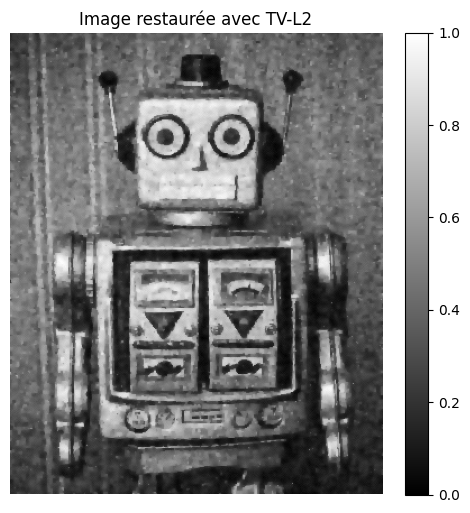

RMSE de l'image restaurée avec TV-L2 : 0.07669964784844677


In [8]:
#fonction sign de l'énoncé
def sign(grad):
    for i in range(grad.shape[0]):
        for j in range(grad.shape[1]):
            if grad[i, j] > 0:
                grad[i, j] = 1
            elif grad[i, j] < 0:
                grad[i, j] = -1
            else:
                grad[i, j] = 0
    return grad

nombre_iter_Q10 = 0
def sous_gradient_TV_L2(img_bruitee, pas, max_iter, epsilon):
    global nombre_iter_Q10 
    k = 0
    u = img_bruitee.copy()

    while k < max_iter:
        grad_x, grad_y = gradient(u)
        sign_grad_x = sign(grad_x)
        sign_grad_y = sign(grad_y)
        div_sign = divergence(sign_grad_x, sign_grad_y)
        g_u = u - img_bruitee - div_sign

        if np.linalg.norm(g_u)/(k+1) < epsilon:
            break

        u = u - (pas/(k+1)) * g_u
        k += 1
        nombre_iter_Q10 += 1
    return u

#paramètres
pas = 0.046
max_iter = 10000
epsilon = 100

start = time.time()
u_TV_L2 = sous_gradient_TV_L2(img_bruitee, pas, max_iter, epsilon)
u_TV_L2_normalized = (u_TV_L2 - np.min(u_TV_L2)) / (np.max(u_TV_L2) - np.min(u_TV_L2))
end = time.time()
print(f"Temps d'exécution Q10: {end - start} secondes")
print(f"Nombre d'itération Q10: {nombre_iter_Q10}")

plt.figure(figsize=(6, 6))
plt.imshow(mat_to_img(u_TV_L2_normalized), cmap="gray")
plt.colorbar()
plt.title("Image restaurée avec TV-L2")
plt.axis("off")
plt.show()

print(f"RMSE de l'image restaurée avec TV-L2 : {RMSE(u_TV_L2_normalized)}")

#On remarque que l'image parait plus flou que le bruitée ==> ses variations sont plus faibles et on voit peu le bruit
#Son RMSE est plus faible que les autres, moins bien en temps

*Choix des paramètres Q10*

Temps d'exécution de la méthode: 43.941171646118164 secondes
pas optimal: 0.046415888336127774
RMSE optimal: 0.07461875965091168
liste espilon
[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
RMSE pour le pas optimal
[0.07461876 0.07461876 0.07672052 0.12727161 0.18528446]


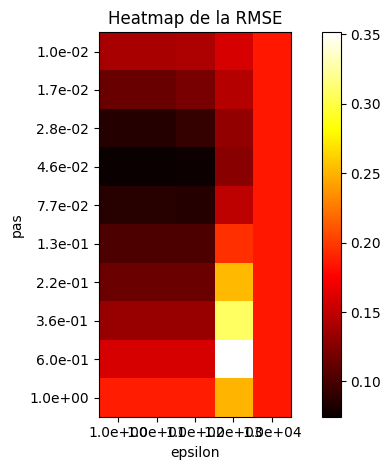

In [9]:
#Choix des paramètres
max_iter = 10

#tab_pas = np.logspace(-3,0,7)
#tab_eps = np.logspace(-3,3,7)

tab_pas = np.logspace(-2,0,10)
tab_eps = np.logspace(0,4,5)
mat_RMSE = np.zeros((len(tab_pas),len(tab_eps)))

min_RMSE = RMSE(img_bruitee)
pas_opti = -1
eps_opti = -1

start = time.time()
for i in range(len(tab_pas)):
    for j in range(len(tab_eps)):
        pas = tab_pas[i]
        epsilon = tab_eps[j]
        
        u_TV_L2 = sous_gradient_TV_L2(img_bruitee, pas, max_iter, epsilon)
        u_TV_L2_normalized = (u_TV_L2 - np.min(u_TV_L2)) / (np.max(u_TV_L2) - np.min(u_TV_L2))

        rmse = RMSE(u_TV_L2_normalized)
        mat_RMSE[i,j] = rmse
        if min_RMSE > rmse:
            min_RMSE = rmse
            pas_opti = pas
            i_opti = i
            
end = time.time()
print(f"Temps d'exécution de la méthode: {end - start} secondes")

print(f"pas optimal: {pas_opti}")
print(f"RMSE optimal: {min_RMSE}")

print("liste espilon")
print(tab_eps)
print("RMSE pour le pas optimal")
print(mat_RMSE[i_opti])

im = plt.imshow(mat_RMSE, cmap='hot', interpolation='nearest')
plt.xticks(ticks=np.arange(len(tab_eps)), labels=[f"{e:.1e}" for e in tab_eps]) #:.1e pour ecriture scientifique
plt.yticks(ticks=np.arange(len(tab_pas)), labels=[f"{p:.1e}" for p in tab_pas])
plt.xlabel("epsilon")
plt.ylabel("pas")
plt.title("Heatmap de la RMSE")
plt.colorbar(im)
plt.tight_layout()
plt.show()

#On conclue ici le choix suivant partiellement arbitraire
#max_iter = 10000
#epsilon = 100
#pas = 0.046


*Question 11*

Temps d'exécution Q11: 1.4361286163330078 secondes
Nombre d'itération Q11: 8


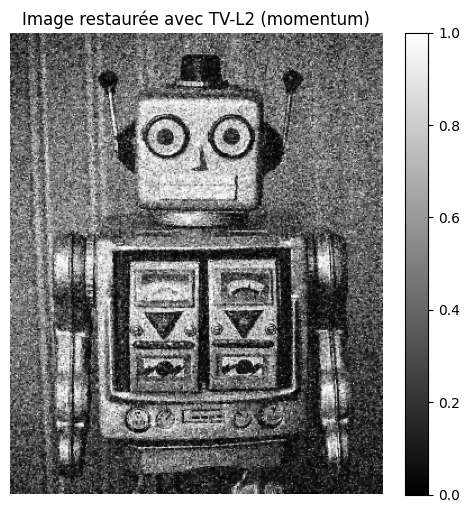

RMSE de l'image restaurée avec TV-L2 (momentum) : 0.1334792607149614


In [10]:
nombre_iter_Q11 = 0
def sous_gradient_TV_L2_momentum(img_bruitee, pas, max_iter, epsilon, beta):
    global nombre_iter_Q11
    k = 0
    u = img_bruitee.copy()
    n, m = img_bruitee.shape
    p = np.zeros_like(u)  #initialisation du momentum

    while k < max_iter:
        grad_x, grad_y = gradient(u)
        sign_grad_x = sign(grad_x)
        sign_grad_y = sign(grad_y)
        div_sign = divergence(sign_grad_x, sign_grad_y)
        g_u = u - img_bruitee - div_sign

        if np.linalg.norm(g_u)/(k+1) < epsilon:
            break

        p = beta * p + (1 - beta) * (-g_u)
        u = u + pas/(k+1) * p
        k += 1
        nombre_iter_Q11 += 1

    return u

#paramètres
pas = 0.046
max_iter = 10000
epsilon = 100
beta = 0.9 

start = time.time()
u_TV_L2_momentum = sous_gradient_TV_L2_momentum(img_bruitee, pas, max_iter, epsilon, beta)
u_TV_L2_momentum_normalized = (u_TV_L2_momentum - np.min(u_TV_L2_momentum)) / (np.max(u_TV_L2_momentum) - np.min(u_TV_L2_momentum))
end = time.time()
print(f"Temps d'exécution Q11: {end - start} secondes")
print(f"Nombre d'itération Q11: {nombre_iter_Q11}")

plt.figure(figsize=(6, 6))
plt.imshow(mat_to_img(u_TV_L2_momentum_normalized), cmap="gray")
plt.colorbar()
plt.title("Image restaurée avec TV-L2 (momentum)")
plt.axis("off")
plt.show()

print(f"RMSE de l'image restaurée avec TV-L2 (momentum) : {RMSE(u_TV_L2_momentum_normalized)}")

#Visuellement les contours sont mieux conservés, le temps d'éxécution est le même et le RMSE plus grand que la version sans momentum

*Question 13*

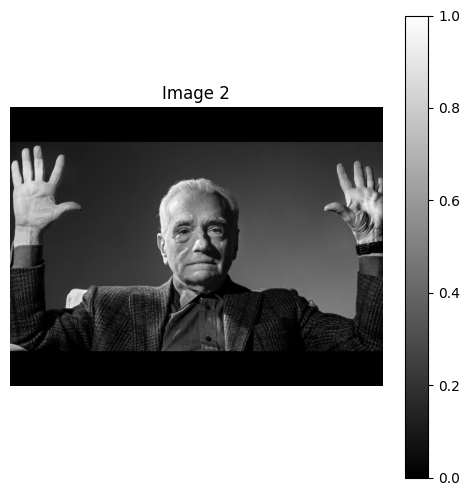

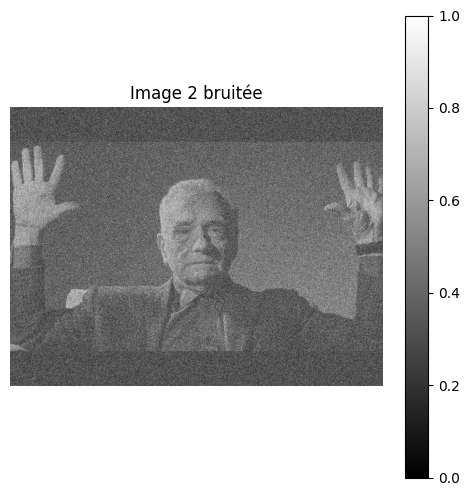

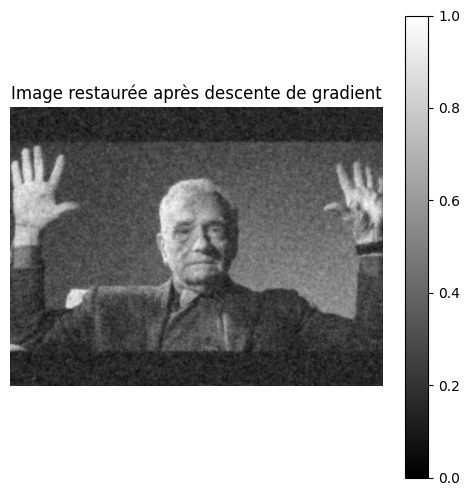

RMSE de l'image bruitée : 0.20034506230981136
RMSE de l'image restaurée : 0.13881229008253057


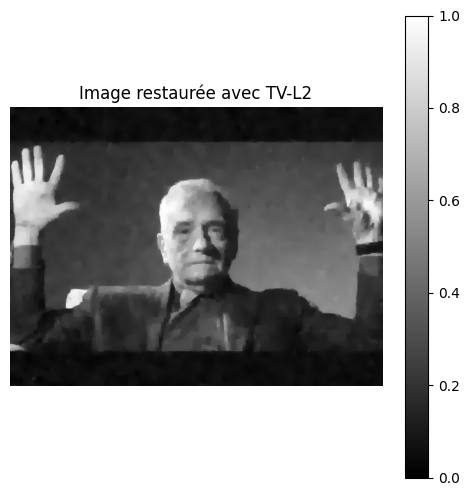

RMSE de l'image restaurée avec TV-L2 : 0.07688631044494755


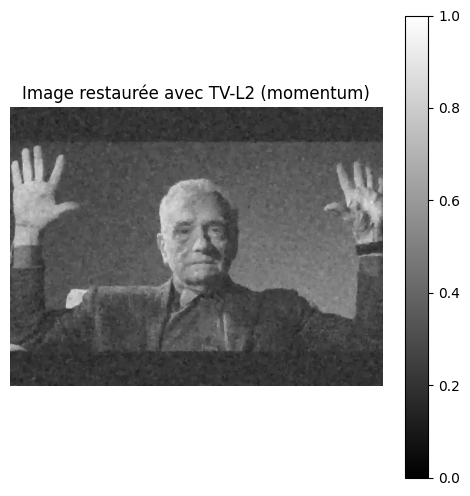

RMSE de l'image restaurée avec TV-L2 (momentum) : 0.16327109778039206


In [11]:
cinema_jpg = "cinema.jpg"
cinema_couleur = plt.imread(cinema_jpg)
cinema = np.mean(cinema_couleur, axis=2)/255

#bruitage de cinema avec un bruit gaussien de moyenne 0 et d'écart-type 0.2
sigma = 0.2
cinema_bruitee = cinema + np.random.normal(0, sigma, cinema.shape)
cinema_bruitee_normalized = (cinema_bruitee - np.min(cinema_bruitee)) / (np.max(cinema_bruitee) - np.min(cinema_bruitee))

plt.figure(figsize=(6, 6))
plt.imshow(mat_to_img(cinema), cmap="gray")
plt.colorbar()
plt.title("Image 2")
plt.axis("off")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(mat_to_img(cinema_bruitee_normalized), cmap="gray")
plt.colorbar()
plt.title("Image 2 bruitée")
plt.axis("off")
plt.show()

# Pour la question 12 je n'ai pas saisi si les 2 méthodes désignaient la question 10 et 11 ou 5 et 10
# je vais donc faire les 3 méthodes

#méthode de descente de gradient avec pas fixe question 5
pas = 0.046   
max_iter = 100
epsilon = 1

u_optim = optim_gradient_fixed_step(cinema_bruitee, pas, max_iter, epsilon)
u_optim_normalized = (u_optim - np.min(u_optim)) / (np.max(u_optim) - np.min(u_optim))

plt.figure(figsize=(6, 6))
plt.imshow(mat_to_img(u_optim_normalized), cmap="gray")
plt.colorbar()
plt.title("Image restaurée après descente de gradient")
plt.axis("off")
plt.show()

print(f'RMSE de l\'image bruitée : {RMSE(cinema_bruitee,cinema)}')
print(f'RMSE de l\'image restaurée : {RMSE(u_optim_normalized,cinema)}')

u_TV_L2 = sous_gradient_TV_L2(cinema_bruitee, pas, max_iter, epsilon)
u_TV_L2_normalized = (u_TV_L2 - np.min(u_TV_L2)) / (np.max(u_TV_L2) - np.min(u_TV_L2))

plt.figure(figsize=(6, 6))
plt.imshow(mat_to_img(u_TV_L2_normalized), cmap="gray")
plt.colorbar()
plt.title("Image restaurée avec TV-L2")
plt.axis("off")
plt.show()

print(f"RMSE de l'image restaurée avec TV-L2 : {RMSE(u_TV_L2_normalized,cinema)}")



# #méthode question 11
beta = 0.9 

# Optimisation avec momentum
u_TV_L2_momentum = sous_gradient_TV_L2_momentum(cinema_bruitee, pas, max_iter, epsilon, beta)
u_TV_L2_momentum_normalized = (u_TV_L2_momentum - np.min(u_TV_L2_momentum)) / (np.max(u_TV_L2_momentum) - np.min(u_TV_L2_momentum)) 


# Affichage
plt.figure(figsize=(6, 6))
plt.imshow(mat_to_img(u_TV_L2_momentum_normalized), cmap="gray")
plt.colorbar()
plt.title("Image restaurée avec TV-L2 (momentum)")
plt.axis("off")
plt.show()

# Calcul du RMSE
print(f"RMSE de l'image restaurée avec TV-L2 (momentum) : {RMSE(u_TV_L2_momentum_normalized,cinema)}")

#On obtient des résultats similaire mais aux valeurs différentes 
#hormis pour le momentum où cela fait regresser le RMSE sans doute à cause de faible contraste